In [1]:
import pandas as pd

file = '../data/palm_ffb.csv'
df = pd.read_csv(file, delimiter=',', parse_dates=['Date'], dayfirst=True)
df.head()

,Date,SoilMoisture,Average_Temp,Min_Temp,Max_Temp,Precipitation,Working_days,HA_Harvested,FFB_Yield
0,2008-01-01,616.4,25.306452,21.3,32.2,184.4,25,777778.3951,1.62
1,2008-02-01,568.9,26.165517,20.9,35.1,140.2,23,767988.2759,1.45
2,2008-03-01,577.6,25.448387,21.3,32.9,280.4,25,783951.9231,1.56
3,2008-04-01,581.1,26.903333,20.6,34.8,173.3,25,788987.0504,1.39
4,2008-05-01,545.4,27.241935,20.9,35.0,140.6,25,813659.7222,1.44


In [2]:
df_filtered = df.drop(columns=['Date', 'HA_Harvested'])
df_filtered.head()

,SoilMoisture,Average_Temp,Min_Temp,Max_Temp,Precipitation,Working_days,FFB_Yield
0,616.4,25.306452,21.3,32.2,184.4,25,1.62
1,568.9,26.165517,20.9,35.1,140.2,23,1.45
2,577.6,25.448387,21.3,32.9,280.4,25,1.56
3,581.1,26.903333,20.6,34.8,173.3,25,1.39
4,545.4,27.241935,20.9,35.0,140.6,25,1.44


In [5]:
# Mengambil semua kolom kecuali 'Date' dan 'HA_Harvested'
df_filtered = df.drop(columns=['Date', 'HA_Harvested'])

# Menghapus baris duplikat
df_filtered = df_filtered.drop_duplicates()

# Menangani nilai yang hilang
# Mengisi nilai yang hilang dengan median kolom (metode ini bisa disesuaikan dengan kebutuhan)
df_filtered = df_filtered.fillna(df_filtered.median())

# Menghapus outlier dengan IQR
def remove_outliers_iqr(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    filtered_df = df[~((df < lower_bound) | (df > upper_bound)).any(axis=1)]
    return filtered_df

# Identifikasi dan hapus outlier
df_filtered = remove_outliers_iqr(df_filtered)

# Menampilkan hasil pembersihan
print("Data setelah pembersihan:")
df_filtered.head()

Data setelah pembersihan:


,SoilMoisture,Average_Temp,Min_Temp,Max_Temp,Precipitation,Working_days,FFB_Yield
0,616.4,25.306452,21.3,32.2,184.4,25,1.62
1,568.9,26.165517,20.9,35.1,140.2,23,1.45
2,577.6,25.448387,21.3,32.9,280.4,25,1.56
3,581.1,26.903333,20.6,34.8,173.3,25,1.39
4,545.4,27.241935,20.9,35.0,140.6,25,1.44


Column: SoilMoisture
Statistics: 0.9822531359179908, p-value: 0.11213462710184213
Data looks normal (fail to reject H0)




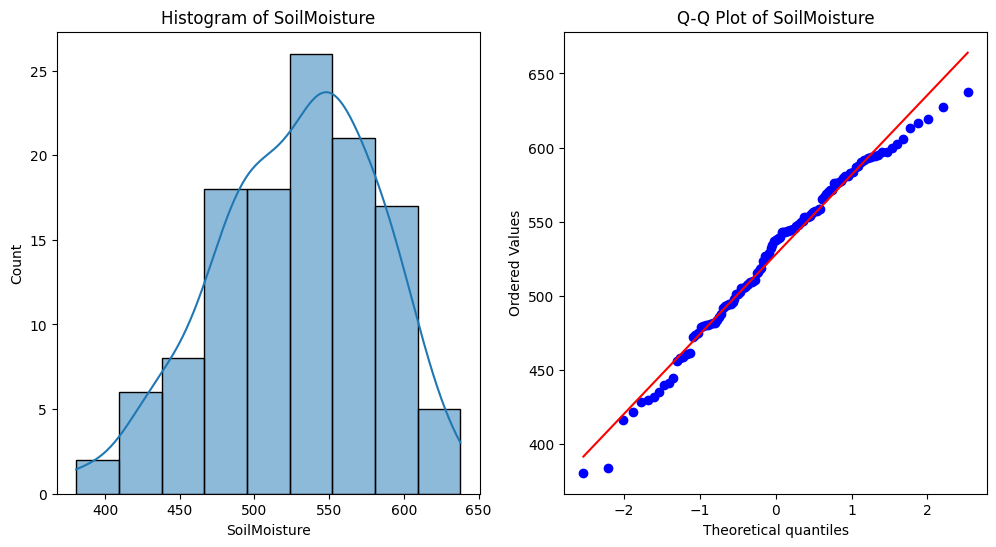

Column: Average_Temp
Statistics: 0.9855086031502414, p-value: 0.223321138758047
Data looks normal (fail to reject H0)




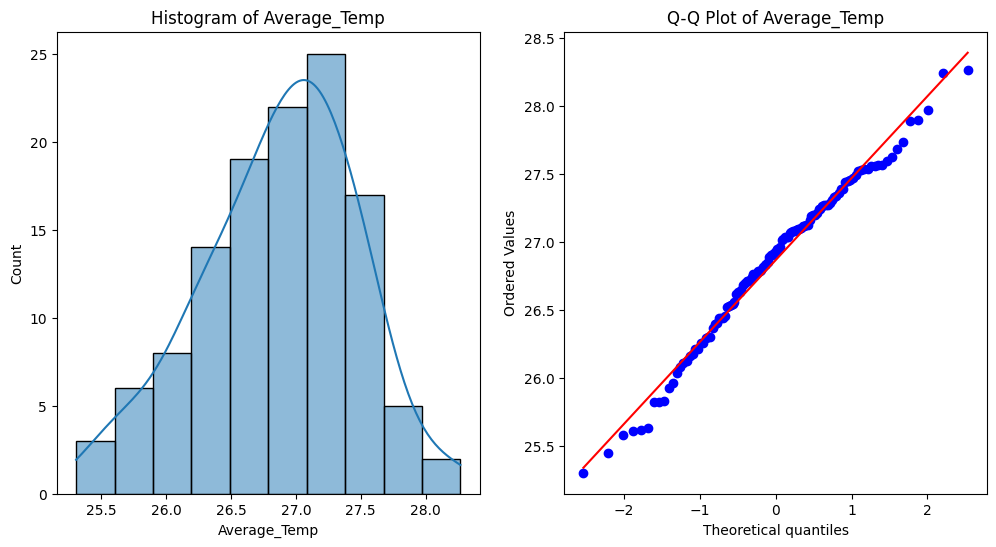

Column: Min_Temp
Statistics: 0.98472361562803, p-value: 0.18962863987095008
Data looks normal (fail to reject H0)




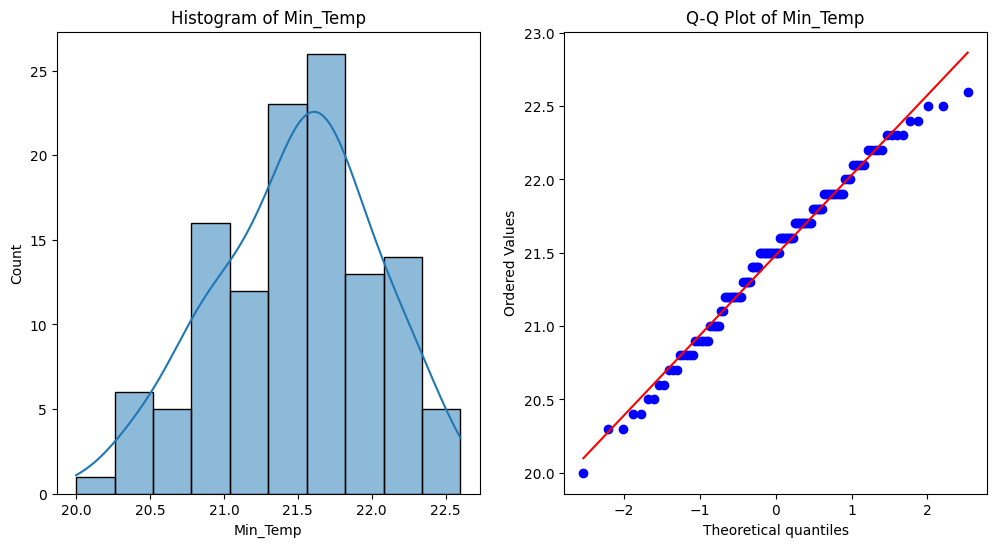

Column: Max_Temp
Statistics: 0.9862752659920864, p-value: 0.2613490462097178
Data looks normal (fail to reject H0)




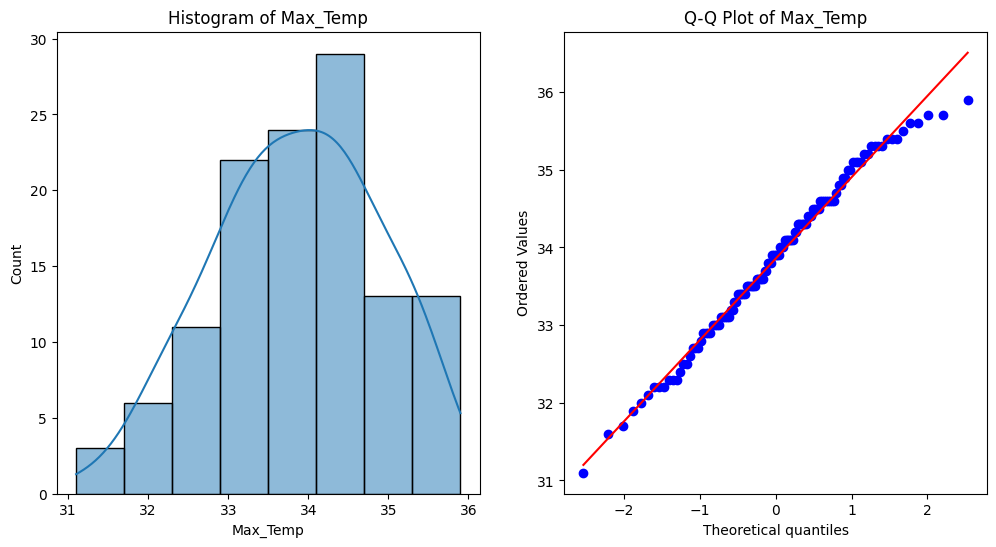

Column: Precipitation
Statistics: 0.9870264088842373, p-value: 0.30396267276590483
Data looks normal (fail to reject H0)




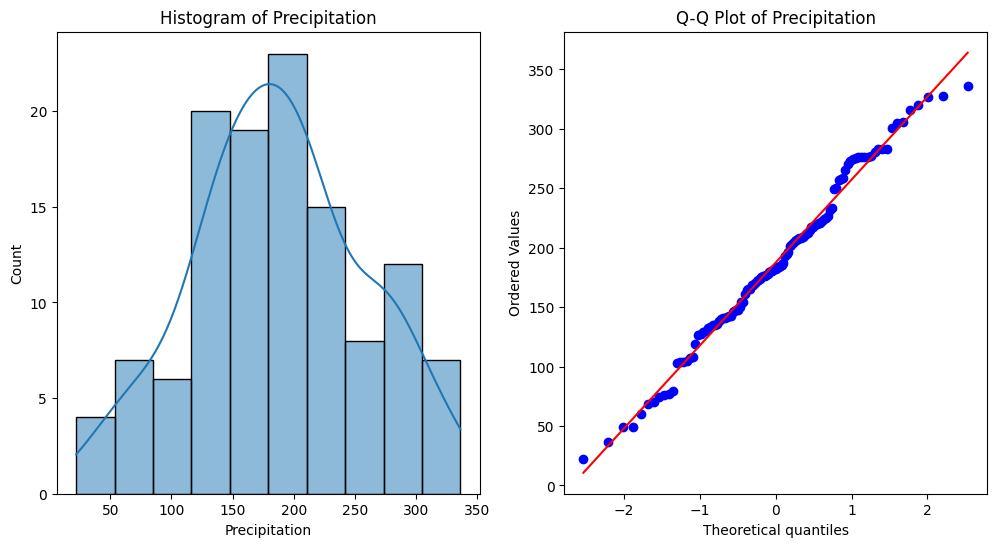

Column: Working_days
Statistics: 0.9123043614964117, p-value: 8.082521166268537e-07
Data does not look normal (reject H0)




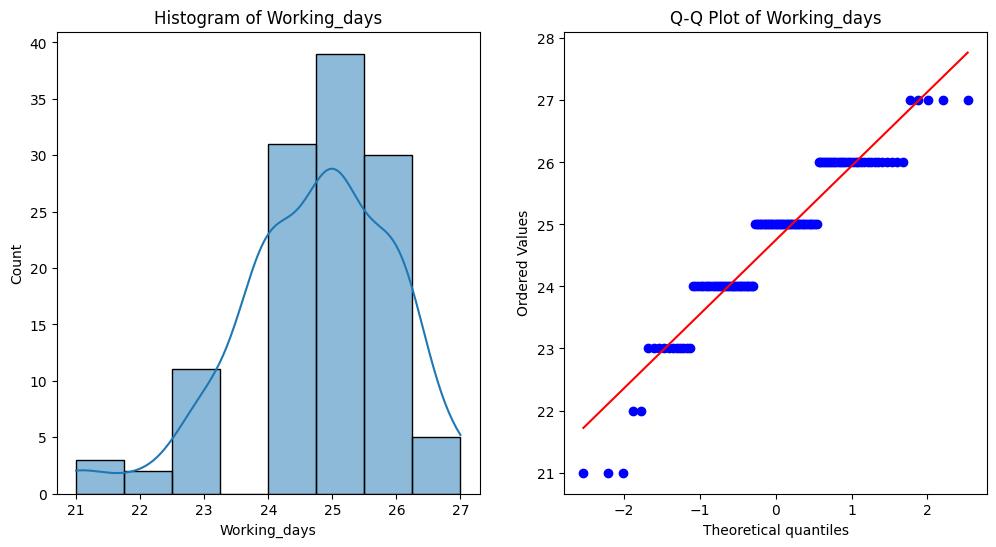

Column: FFB_Yield
Statistics: 0.982665124792967, p-value: 0.12249453797638715
Data looks normal (fail to reject H0)




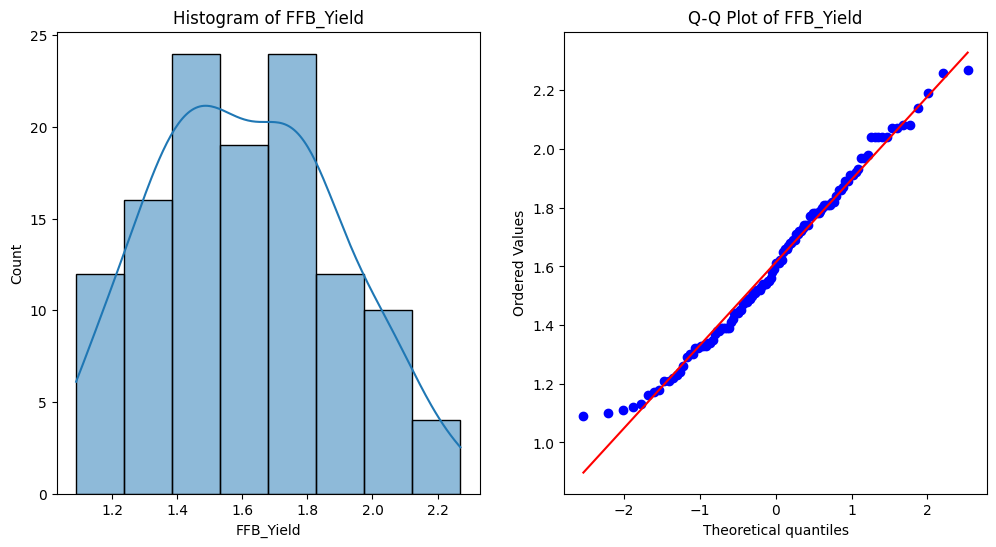

In [6]:
#Uji Normalitas
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Mengatasi Nilai Hilang
data_cleaned = df_filtered.dropna()  

# 2. Menghapus Outlier (Menggunakan IQR)
Q1 = data_cleaned.quantile(0.25)
Q3 = data_cleaned.quantile(0.75)
IQR = Q3 - Q1
df_cleaned = data_cleaned[~((data_cleaned < (Q1 - 1.5 * IQR)) | (data_cleaned > (Q3 + 1.5 * IQR))).any(axis=1)]

for column in df_cleaned.columns:
    if df_cleaned[column].dtype in [np.int64, np.float64]:  # Memeriksa kolom numerik
        stat, p_value = stats.shapiro(df_cleaned[column])
        print(f"Column: {column}")
        print(f"Statistics: {stat}, p-value: {p_value}")
        if p_value > 0.05:
            print("Data looks normal (fail to reject H0)")
        else:
            print("Data does not look normal (reject H0)")
        print("\n")

        # 4. Visualisasi
        plt.figure(figsize=(12, 6))
        
        # Histogram
        plt.subplot(1, 2, 1)
        sns.histplot(df_cleaned[column], kde=True)
        plt.title(f'Histogram of {column}')
        
        # Q-Q Plot
        plt.subplot(1, 2, 2)
        stats.probplot(df_cleaned[column], dist="norm", plot=plt)
        plt.title(f'Q-Q Plot of {column}')
        
        plt.show()

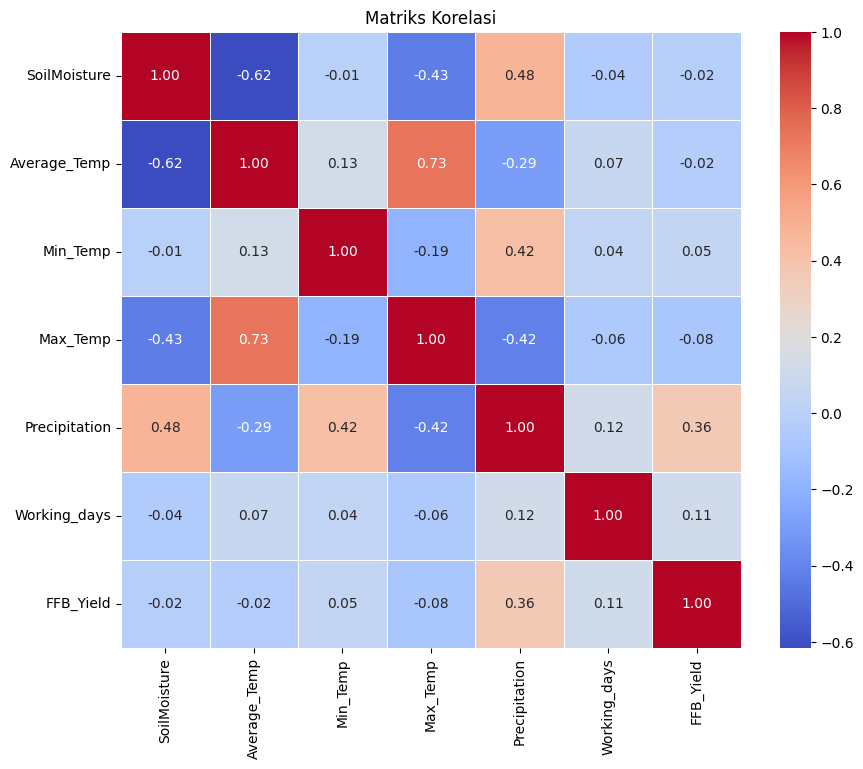

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix = df_filtered.corr(method='pearson')  

# Membuat heatmap matriks korelasi
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matriks Korelasi')
plt.show()

In [8]:
# Menentukan ambang batas korelasi tinggi
threshold = 0.7

# Menyimpan fitur yang akan dihapus
to_drop = []

# Mengidentifikasi fitur dengan korelasi tinggi
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > threshold:
            # Menyimpan nama fitur yang memiliki korelasi tinggi
            colname = corr_matrix.columns[i]
            if colname not in to_drop:
                to_drop.append(colname)

# Menghapus fitur yang redundant
df_reduced = df_cleaned.drop(columns=to_drop)

# Menampilkan fitur yang dihapus dan dataset yang telah dibersihkan
print("Fitur yang dihapus:", to_drop)
print("Dataset setelah penghapusan:")
df_reduced.head()

Fitur yang dihapus: ['Max_Temp']
Dataset setelah penghapusan:


,SoilMoisture,Average_Temp,Min_Temp,Precipitation,Working_days,FFB_Yield
0,616.4,25.306452,21.3,184.4,25,1.62
1,568.9,26.165517,20.9,140.2,23,1.45
2,577.6,25.448387,21.3,280.4,25,1.56
3,581.1,26.903333,20.6,173.3,25,1.39
4,545.4,27.241935,20.9,140.6,25,1.44


In [9]:
def identification_multicollinearity(df_reduced):
    
    from statsmodels.stats.outliers_influence import variance_inflation_factor
    from statsmodels.tools.tools import add_constant

    X = df[['SoilMoisture', 'Average_Temp', 'Min_Temp', 'Max_Temp', 'Precipitation', 'Working_days']]

    X_with_const = add_constant(X)
    
    vif_data = pd.DataFrame()
    
    vif_data["Variable"] = X_with_const.columns
    
    vif_data["VIF"] = [variance_inflation_factor(X_with_const.values, i) for i in range(X_with_const.shape[1])]

    
    return vif_data

identification_multicollinearity(df_reduced)

,Variable,VIF
0,const,4735.785250
1,SoilMoisture,2.209725
2,Average_Temp,3.972864
3,Min_Temp,1.456216
4,Max_Temp,3.009403
5,Precipitation,1.862736
6,Working_days,1.057829


In [10]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from prettytable import PrettyTable
import statsmodels.api as sm

def multiple_linear_regression(df_reduced):
   
    X = df_reduced[['SoilMoisture', 'Average_Temp', 'Min_Temp', 'Precipitation', 'Working_days']]
    y = df_reduced['FFB_Yield']

    
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    
    X_scaled = sm.add_constant(X_scaled)
    model = sm.OLS(y, X_scaled).fit()

    table = PrettyTable()
    table.field_names = ["Variable", "Coefficient", "Standard Error", "t-Value", "p-Value"]

    for i, variable in enumerate(model.params.index):
        table.add_row([
            variable,
            f"{model.params[variable]:.4f}",
            f"{model.bse[variable]:.4f}",
            f"{model.tvalues[variable]:.4f}",
            f"{model.pvalues[variable]:.4f}"
        ])

    table.add_row(["R-squared", f"{model.rsquared:.4f}", "", "", ""])
    table.add_row(["Adjusted R-squared", f"{model.rsquared_adj:.4f}", "", "", ""])

    return table

summary_table = multiple_linear_regression(df_reduced)
print("Model Summary:")
print(summary_table)


Model Summary:
+--------------------+-------------+----------------+---------+---------+
|      Variable      | Coefficient | Standard Error | t-Value | p-Value |
+--------------------+-------------+----------------+---------+---------+
|       const        |    1.6126   |     0.0232     | 69.5362 |  0.0000 |
|         x1         |   -0.0893   |     0.0324     | -2.7598 |  0.0067 |
|         x2         |   -0.0074   |     0.0301     | -0.2471 |  0.8052 |
|         x3         |   -0.0537   |     0.0278     | -1.9363 |  0.0553 |
|         x4         |    0.1649   |     0.0314     |  5.2446 |  0.0000 |
|         x5         |    0.0109   |     0.0235     |  0.4645 |  0.6431 |
|     R-squared      |    0.2102   |                |         |         |
| Adjusted R-squared |    0.1759   |                |         |         |
+--------------------+-------------+----------------+---------+---------+


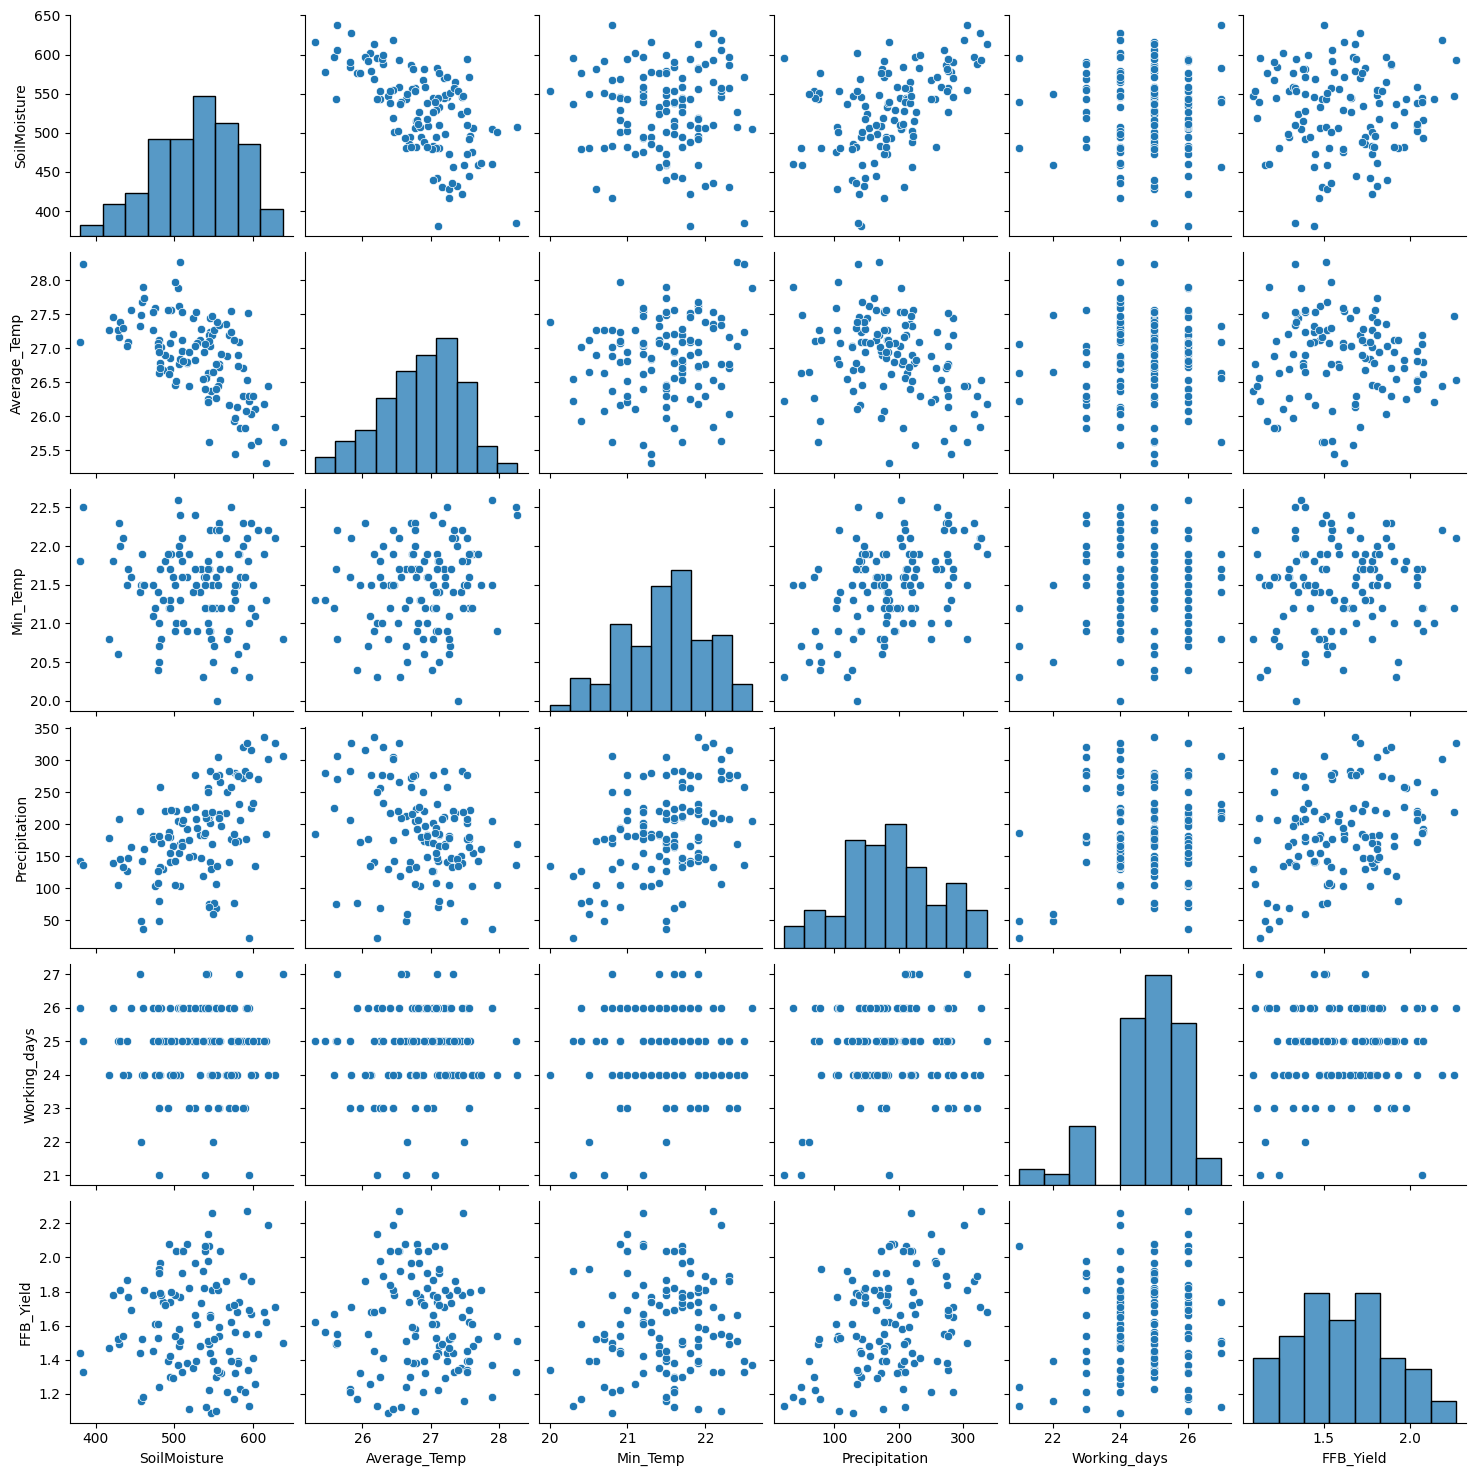

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Pair Plot
sns.pairplot(df_reduced[['SoilMoisture', 'Average_Temp', 'Min_Temp', 'Precipitation', 'Working_days', 'FFB_Yield']])
plt.show()

In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score


X = data_cleaned[['SoilMoisture', 'Average_Temp', 'Min_Temp', 'Precipitation', 'Working_days']]
y = data_cleaned['FFB_Yield']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


pipeline_poly = Pipeline([
    ('poly', PolynomialFeatures(degree=2, include_bias=False)),
    ('model', LinearRegression())
])


pipeline_poly.fit(X_train, y_train)


y_pred_poly = pipeline_poly.predict(X_test)


mse_poly = mean_squared_error(y_test, y_pred_poly)
r2_poly = r2_score(y_test, y_pred_poly)

print(f'Polinomial Regression MSE: {mse_poly}')
print(f'Polinomial Regression R^2: {r2_poly}')


pipeline_dt = Pipeline([
    ('model', DecisionTreeRegressor())
])


pipeline_dt.fit(X_train, y_train)


y_pred_dt = pipeline_dt.predict(X_test)


mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

print(f'Decision Tree Regressor MSE: {mse_dt}')
print(f'Decision Tree Regressor R^2: {r2_dt}')


pipeline_rf = Pipeline([
    ('model', RandomForestRegressor())
])


pipeline_rf.fit(X_train, y_train)


y_pred_rf = pipeline_rf.predict(X_test)


mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f'Random Forest Regressor MSE: {mse_rf}')
print(f'Random Forest Regressor R^2: {r2_rf}')


Polinomial Regression MSE: 0.12800804814043723
Polinomial Regression R^2: -0.7354820885164577
Decision Tree Regressor MSE: 0.1472
Decision Tree Regressor R^2: -0.9956789212921593
Random Forest Regressor MSE: 0.0693794800000001
Random Forest Regressor R^2: 0.059380667077369886
